# Final touch to the assembly before polishing

This Jupyter notebook will guide you on how to create a cleaner assembly after rerunning Verkko to fill some gaps and before proceeding to the polishing step. This includes contig trimming, chromosome flipping, and chromosome renaming.

In [2]:
%load_ext autoreload
%autoreload 2


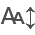

In [3]:
import sys 
import importlib
import pandas as pd
import time
import os
from IPython.display import Image, display
pd.set_option('mode.chained_assignment', None)
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
import warnings
import session_info
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
import verkkofillet as vf
# importlib.reload(vf)

verkkoFillet version 0.1.0
verkkoFillet version 0.1.0


<module 'verkkoFillet' from '/path/to/your/folder/script/post_verkko_pkg/src/verkkoFillet/__init__.py'>

## Load data

In [6]:
verkkoDir="/path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0"

In [7]:
obj = vf.pp.read_Verkko(verkkoDir)

The Verkko fillet target directory already exists: /path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet
If you didn't mean this, please set another directory or for overwirting, please use force= True
Lock the original Verkko folder to prevent it from being modified.
[lock_original_folder] Command executed successfully!
Path file loading...from /path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet/assembly.paths.tsv
Path file loaded successfully.
scfmap file loading...from /path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet/assembly.scfmap
scfmap file loaded successfully.


In [24]:
os.chdir(obj.verkko_fillet_dir)

In [9]:
obj

FilletObj
  verkkoDir: /path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0
  verkko_fillet_dir: /path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet
  paths: name, path, assignment
  history: timestamp, activity
  scfmap: contig, pathName

## Make stats

In [8]:
%%time
vf.tl.getT2T(obj)

getT2T was done!
CPU times: user 2.26 ms, sys: 6.25 ms, total: 8.51 ms
Wall time: 6.86 s


In [36]:
ref_fasta = "/path/to/your/folder/ncbiRef/GCA_017591445.1_ASM1759144v1_genomic.rename.fa"
map_file="/path/to/your/folder/verkko2.2_hifi-duplex_trio-hic/verkko-thic_legacy/chromosome.map"

In [37]:
%%time
ref = "/path/to/your/folder/ncbiRef/GCA_017591445.1_ASM1759144v1_genomic.rename.fa"
vf.tl.chrAssign(obj = obj, ref = ref)

The [assembly.mashmap.out] file is already exists
If you want to re-run this job, please detete [assembly.mashmap.out]
CPU times: user 217 µs, sys: 87 µs, total: 304 µs
Wall time: 391 µs


In [38]:
obj = vf.pp.readChr(obj, map_file, sire = "pat", dam = "mat")

The chromosome infomation was stored in obj.stats


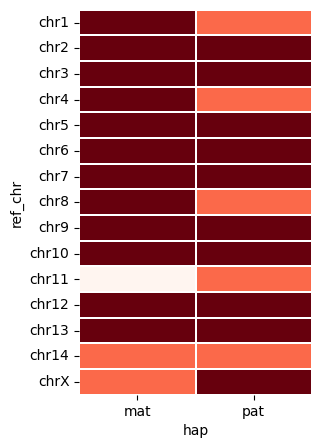

In [12]:
vf.pl.contigPlot(obj)

## Trimming

In [13]:
# vf.tl.run_intra_telo(obj)

In [15]:
file = "assembly.tel_finder.windows.0.5.bed"
vf.pp.find_intra_telo(obj, file=file, loc_from_end=15000)

contig     old_chr ref_chr  hap  start  \
0  dam_compressed.k31.hapmer-0000002  CM029959.1   chr11  mat  18800   

         end    len_fai  
0  152521400  152521440

In [16]:
trim_contig_dict = { 'contig' : ['dam_compressed.k31.hapmer-0000002'],
                    'from' : [18800],
                    'to' : [152521440]
}

In [17]:
vf.tl.runTrimming(obj, trim_contig_dict)

Trim Chromosomes:   0%|                         | 1/253 [00:00<02:19,  1.80it/s]

dam_compressed.k31.hapmer-0000002 will be trimmed
samtools faidx assembly.fasta dam_compressed.k31.hapmer-0000002:18800-152521440 | sed -e '1d' | sed -e '1i >dam_compressed.k31.hapmer-0000002'>> assembly_trimmed.fasta


Trim Chromosomes: 100%|███████████████████████| 253/253 [00:15<00:00, 16.18it/s]

Trimming completed. Output file: assembly_trimmed.fasta


## Flipping chromosome

If your species already has a reference genome, you can examine the orientation of your assembly. If the orientation is flipped, you can adjust (flip) specific chromosomes as needed. However, it is important to ensure that the previous reference genome was carefully curated for orientation. To confirm this, you can review the methods section in the original publication associated with the released reference genome or other relevant documentation.

output
* `assembly.mashmap.out`
* `assembly.homopolymer-compressed.chr.csv`
* `unitigs.hpc.mashmap.out`
* `translation_hap1`
* `translation_hap2`
* `chr_completeness_max_hap1`
* `chr_completeness_max_hap2`

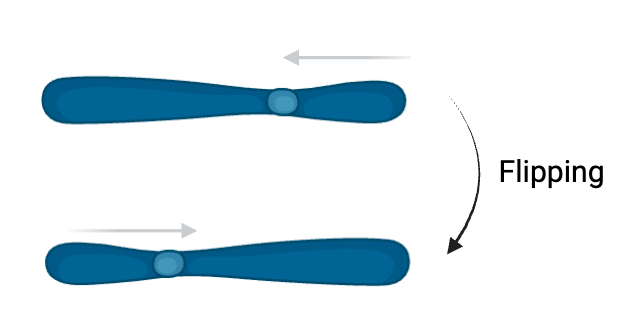

In [7]:
image_path = "/path/to/your/folder/script/post_verkko_pkg/data/test_giraffe/fig/chromosomeFlipping.png"
display(Image(filename=image_path,width=400))

[showPairwiseAlign_1] Command executed successfully!
[showPairwiseAlign_2] Command executed successfully!


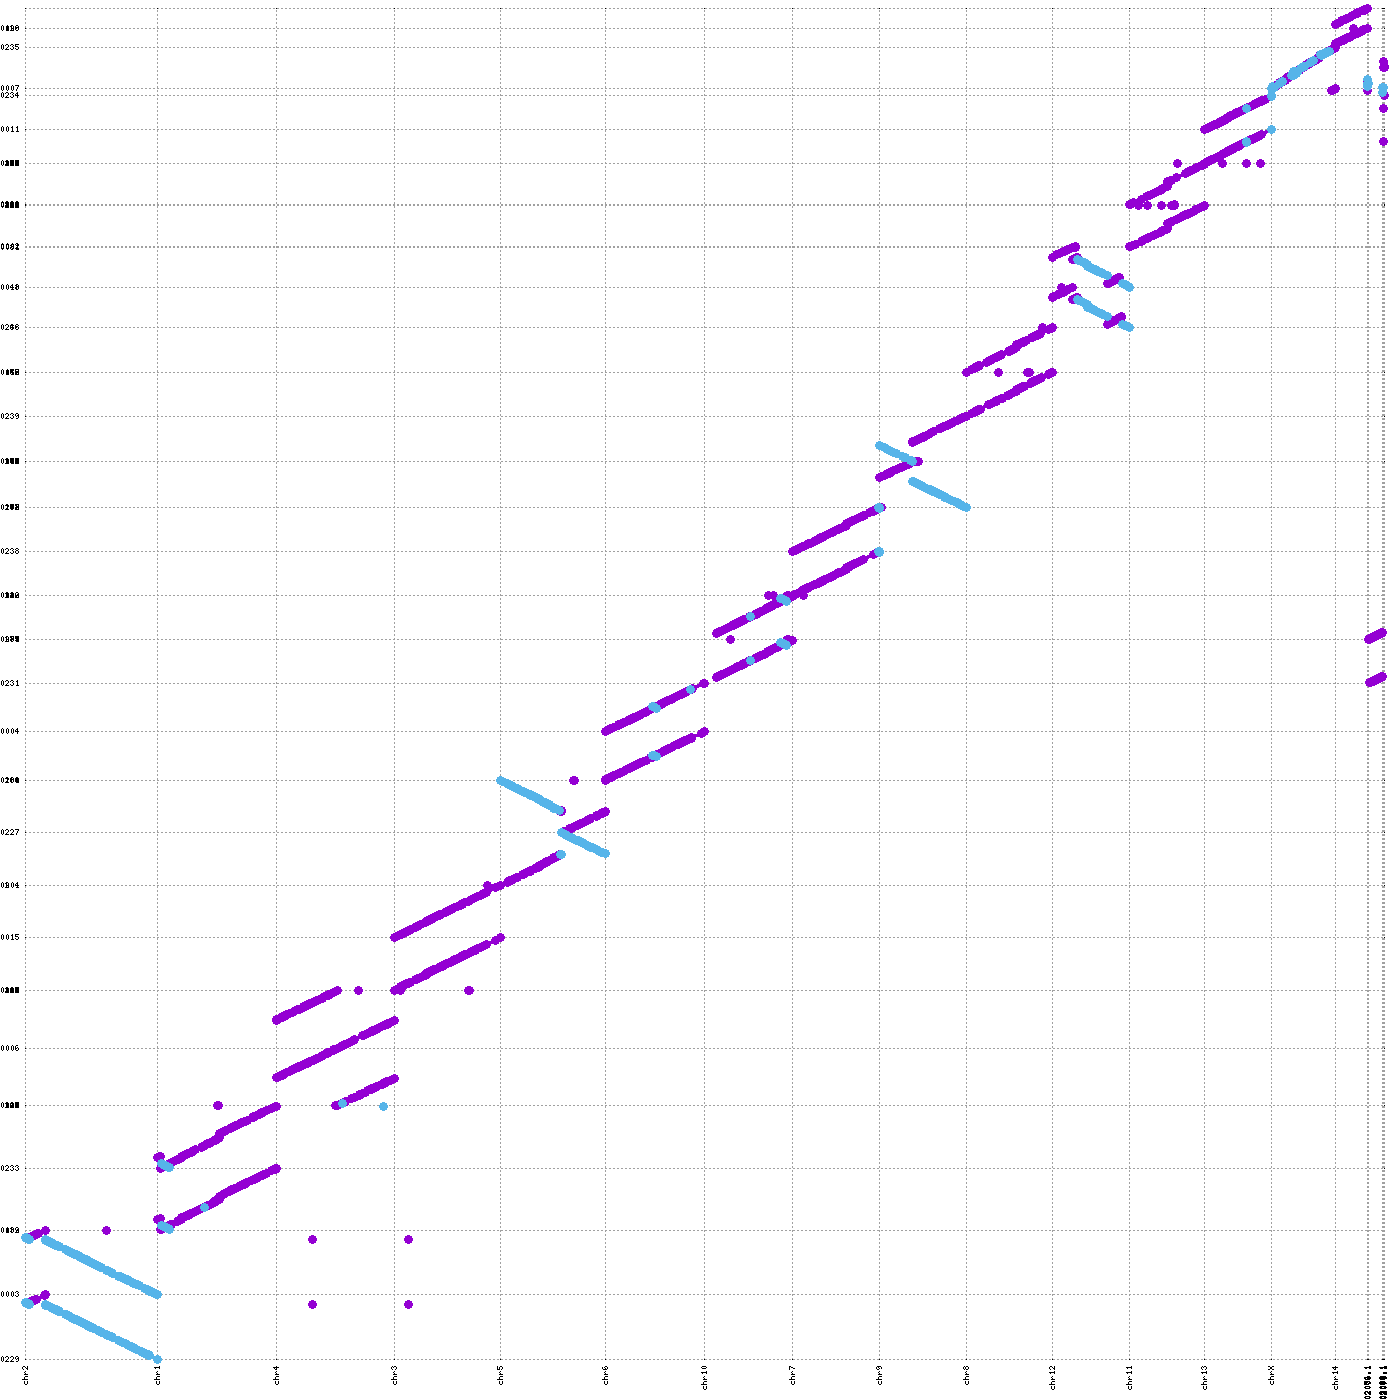

In [307]:
vf.tl.showPairwiseAlign(obj, size="large", minLen = 100000)

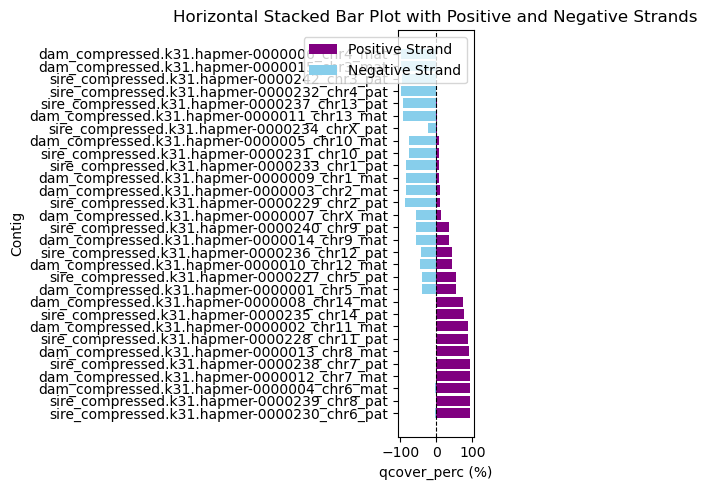

In [308]:
vf.pl.showMashmapOri(obj , by = 'all')

In [31]:
filp_contig_list = ['sire_compressed.k31.hapmer-0000229', #chr2_pat
                   'dam_compressed.k31.hapmer-0000003', # chr2_mat
                   'sire_compressed.k31.hapmer-0000242', #chr3_pat
                   'dam_compressed.k31.hapmer-0000015', #chr3_mat
                   'sire_compressed.k31.hapmer-0000232', #chr4_mat
                   'dam_compressed.k31.hapmer-0000006', #chr3_pat
                   'sire_compressed.k31.hapmer-0000230', #chr6_pat
                   'dam_compressed.k31.hapmer-0000004', #chr6_mat
                   'sire_compressed.k31.hapmer-0000238', #chr7_pat
                   'dam_compressed.k31.hapmer-0000012', #chr7_mat
                   'sire_compressed.k31.hapmer-0000239', #chr8_pat
                   'dam_compressed.k31.hapmer-0000013', #chr8_mat
                   'sire_compressed.k31.hapmer-0000240', #chr9_pat
                   'dam_compressed.k31.hapmer-0000014',] #chr9_pat

In [32]:
len(filp_contig_list)

14

In [39]:
obj.stats.loc[obj.stats['contig'].isin(filp_contig_list),]

contig ref_chr  contig_len  ref_chr_len  hap  \
12   dam_compressed.k31.hapmer-0000003    chr2   239044151    236005560  mat   
13  sire_compressed.k31.hapmer-0000229    chr2   238229772    236005560  pat   
14   dam_compressed.k31.hapmer-0000015    chr3   192562693    188995985  mat   
15  sire_compressed.k31.hapmer-0000242    chr3   193438327    188995985  pat   
16   dam_compressed.k31.hapmer-0000006    chr4   212706385    210284866  mat   
17  sire_compressed.k31.hapmer-0000232    chr4   212385659    210284866  pat   
20   dam_compressed.k31.hapmer-0000004    chr6   179095105    176673557  mat   
21  sire_compressed.k31.hapmer-0000230    chr6   178486878    176673557  pat   
22   dam_compressed.k31.hapmer-0000012    chr7   161460775    154917489  mat   
23  sire_compressed.k31.hapmer-0000238    chr7   162115183    154917489  pat   
24   dam_compressed.k31.hapmer-0000013    chr8   163639056    153209366  mat   
25  sire_compressed.k31.hapmer-0000239    chr8   160704071    153209366  pat   
26   dam_compressed.k31.hapmer-0000014    chr9   166642202    153729825  mat   
27  sire_compressed.k31.hapmer-0000240    chr9   167853759    153729825  pat   

       old_chr  completeness hap_verkko t2tStat  
12  CM029950.1       101.288        dam     ctg  
13  CM029950.1       100.942       sire     ctg  
14  CM029951.1       101.887        dam     ctg  
15  CM029951.1       102.350       sire     ctg  
16  CM029952.1       101.152        dam     ctg  
17  CM029952.1       100.999       sire     scf  
20  CM029954.1       101.371        dam     ctg  
21  CM029954.1       101.026       sire     ctg  
22  CM029955.1       104.224        dam     ctg  
23  CM029955.1       104.646       sire     ctg  
24  CM029956.1       106.807        dam     ctg  
25  CM029956.1       104.892       sire     scf  
26  CM029957.1       108.399        dam     ctg  
27  CM029957.1       109.188       sire     ctg

The `vf.tl.flipChr()` function flips the original FASTA file using the list of chromosomes, flip_contig_list. The final FASTA file will be generated with the suffix `_flipped.fasta`.

In [44]:
vf.tl.flipContig(filp_contig_list, 
              ori_fasta="assembly_trimmed.fasta",
              final_fasta="assembly_trimmed_flipped.fasta")

Flipping Chromosomes: 100%|███████████████████| 253/253 [00:58<00:00,  4.31it/s]

The chromosome flipping was completed successfully!
Output FASTA: assembly_trimmed_flipped.fasta


## Renaming Primary and Other Small Contigs with Chromosome Information and Haplotype

We will rename contigs using patterns such as [chr]\_[hap] for primary chromosomes and [chr]\_[hap]\_random\_[node] for random contigs, where node represents a representative node in the path. You can trace back the original paths later.
                  
* chr: chr1, chr2, chr3, ... UnChr
* hap: mat, pat, or Unhap

`vf.pp.find_multi_used_node()` identifies nodes that are used by more than one chromosome. We will exclude these nodes when clustering nodes by chromosome using link information from the GFA file.


You will get two outputs:

* `duplicate_nodes`: A list of nodes used in different chromosomes.
* `node_database`: A dataframe with two columns ("chromosome" and "nodeSet"), containing the set of nodes used exclusively in the corresponding chromosome.

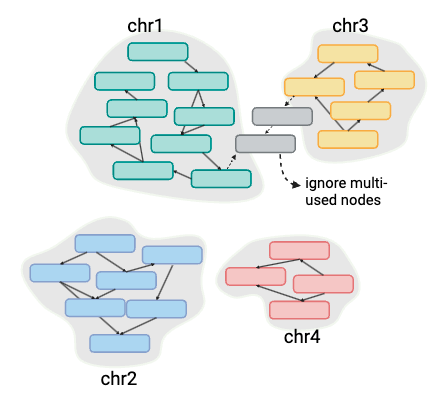

In [6]:
image_path = "/path/to/your/folder/script/post_verkko_pkg/data/test_giraffe/fig/nodeClustering.png"
display(Image(filename=image_path,width=400))

In [57]:
duplicate_nodes, node_database = vf.pp.find_multi_used_node(obj)
# duplicates, node_database = vf.pp.find_multi_used_node(obj)
duplicate_nodes

['utig4-1759', 'utig4-1805', 'utig4-1757']

`The vf.pp.naming_contigs()` function uses the FAI index of assembly.fasta located in the `obj.verkkoDir` directory, along with `obj.paths` and `obj.scfmap`, to assign the corresponding chromosome and haplotype to non-primary contigs.

In [58]:
chrMap = vf.pp.naming_contigs(obj, node_database, duplicate_nodes)

component_15 : empty


In [61]:
chrMap

contig            new_contig_name
0     dam_compressed.k31.hapmer-0000001                   chr5_mat
1     dam_compressed.k31.hapmer-0000002                  chr11_mat
2     dam_compressed.k31.hapmer-0000003                   chr2_mat
3     dam_compressed.k31.hapmer-0000004                   chr6_mat
4     dam_compressed.k31.hapmer-0000005                  chr10_mat
..                                  ...                        ...
218  sire_compressed.k31.hapmer-0000332  chr1_pat_random_utig4-844
219  sire_compressed.k31.hapmer-0000335    chr8_pat_random_utig4-9
220  sire_compressed.k31.hapmer-0000336   chr8_pat_random_utig4-92
221  sire_compressed.k31.hapmer-0000337   chr8_pat_random_utig4-94
222  sire_compressed.k31.hapmer-0000338   chr8_pat_random_utig4-95

[253 rows x 2 columns]

If you have made any changes to the chromosome naming, please edit the chrMap directly before using `vf.tl.renameContig()`.

In [60]:
chrMap['new_contig_name'] = chrMap['new_contig_name'].replace('chrX_pat', 'chrY_pat')

This is the final step. Using the dataframe obtained above, we can rename the contigs using `vf.tl.renameContig()`. The final FASTA file will be generated with the suffix `_rename.fasta`.

In [62]:
vf.tl.renameContig(obj, chrMap, original_fasta="assembly_trimmed_flipped.fasta")

[chrRename] Command executed successfully!
Final renamed fasta file : assembly_trimmed_flipped_rename.fasta


## Sort

Before polishing, we will sort the contigs either by chr or by hap:
* by `hap`: Contigs will be sorted by chromosome within haplotype. For example: chr1_mat > chr2_mat > chr3_mat > ... > chrX_mat > chr1_pat > chr2_pat > ... > chr1_mat_random_utig4-10 > ...
* by `chr`: Contigs will be sorted by haplotype within chromosome. For example: chr1_mat > chr1_pat > chr2_mat > chr2_pat > ... > chr1_mat_random_utig4-10 > ...

The default mode is `sort_by="hap"`. You can use `sort_by="chr"`, but hap sorting is better when viewing the assembly in IGV.

In [63]:
vf.tl.sortContig("assembly_trimmed_flipped_rename.fasta", sort_by="hap")

Sorted sequences have been written to assembly_trimmed_flipped_rename_sortedhap.fasta
